IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("C:/Users/shrut/OneDrive/Desktop/Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


DATA ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'] , inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df,columns=['Geography' ,'Gender'],drop_first = True)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


SPLITTING THE DATA INTO TRANING AND TESTING 

In [15]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test= train_test_split(x,y , test_size=0.2 , random_state=1)

In [16]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

STANDARIZES THE DATA 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [18]:
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [19]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
x_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

IMPORT TENSORFLOW LIBRARIES

In [21]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model= Sequential()
model.add(Dense(11, activation='relu' , input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

Getting some imformation related to number of parameters 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy' , optimizer='Adam' , metrics=['accuracy'])


In [25]:
history =model.fit(x_train_scaled , y_train , epochs=14)

Epoch 1/14
250/250 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7747
Epoch 2/14
250/250 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7993
Epoch 3/14
250/250 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8029
Epoch 4/14
250/250 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8140
Epoch 5/14
250/250 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8206
Epoch 6/14
250/250 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8270
Epoch 7/14
250/250 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8342
Epoch 8/14
250/250 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8401
Epoch 9/14
250/250 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8459
Epoch 10/14
250/250 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8493

In [26]:
model.layers[0].get_weights()

[array([[-0.12201376,  0.27983472, -0.02448521, -0.37312368, -0.2865436 ,
          0.24383634, -0.07527868,  0.33072245, -0.04707939, -0.03570403,
          0.48449856],
        [ 0.2849409 ,  0.08630195, -0.02582498, -0.28401956, -0.2134279 ,
          0.31189445,  0.6745981 , -0.8402143 ,  0.57766664,  0.7253418 ,
         -0.41823697],
        [-0.14351739, -0.1307869 ,  0.0414915 , -0.11642385,  0.45041117,
          0.11933187, -0.24069898, -0.13093472,  0.28445536,  0.12602268,
         -0.63035774],
        [-0.41051373,  0.6950745 , -0.6388726 , -0.4479037 ,  0.25466082,
          0.03717484,  0.05537264,  0.41854367, -0.08564771,  0.30111504,
          0.10391294],
        [-0.6206306 ,  0.4159608 ,  0.17077938,  0.7397436 , -0.1669774 ,
         -0.9710526 , -0.3746763 ,  0.05494638, -0.03439065,  1.0103526 ,
          0.06758758],
        [ 0.21596655, -0.32676816, -0.05918061,  0.24060343,  0.08474344,
         -0.2896882 , -0.2241885 , -0.46605644,  0.12946184, -0.0401746

In [27]:
y_log =model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [28]:
y_predict=np.where(y_log>0.5 , 1, 0)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_predict)

0.8595

ACURRACY = APROX 86%

In [30]:
history.history

{'loss': [0.5354281067848206,
  0.46084141731262207,
  0.4355207681655884,
  0.42158713936805725,
  0.41011396050453186,
  0.4000207185745239,
  0.38995644450187683,
  0.38026517629623413,
  0.37062692642211914,
  0.3634122908115387,
  0.3574605882167816,
  0.35300886631011963,
  0.349278062582016,
  0.34634047746658325],
 'accuracy': [0.7747499942779541,
  0.7992500066757202,
  0.8028749823570251,
  0.8140000104904175,
  0.8206250071525574,
  0.8270000219345093,
  0.8342499732971191,
  0.8401250243186951,
  0.8458750247955322,
  0.8492500185966492,
  0.8536249995231628,
  0.8552500009536743,
  0.8582500219345093,
  0.8582500219345093]}

PLOTTING SOME GHRAPHS FOR LOSS AND ACCURACY 

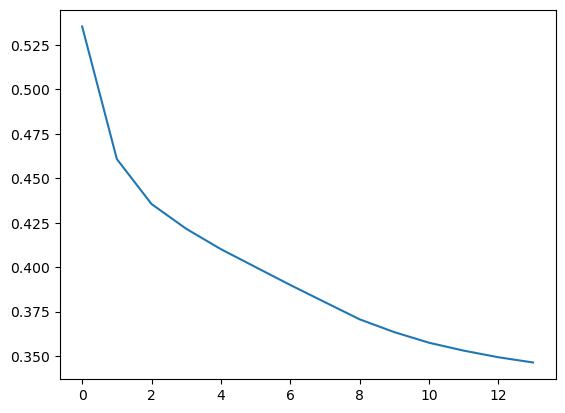

In [31]:
plt.plot(history.history['loss'])

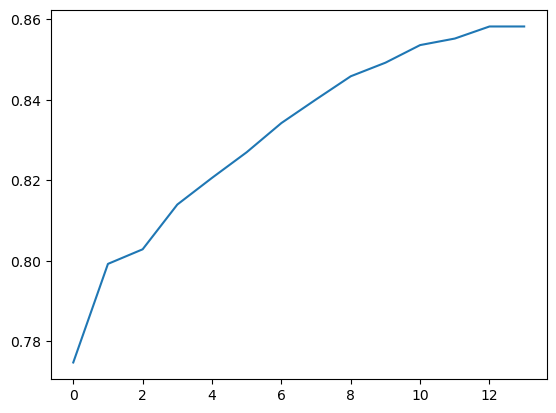

In [32]:
plt.plot(history.history['accuracy'])